In [35]:
%load_ext autoreload
%autoreload 2

import shutil

from robin.plotter.entities import KernelPlotter
from robin.supply.generator.entities import SupplyGenerator
from robin.supply.entities import Supply

from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
supply_config_path = Path("../configs/supply_generator/supply_data.yaml")
generator_config_path = Path("../configs/supply_generator/config.yaml")

# Save paths
generator_save_path = Path(f'../data/generator/supply_dummy.yaml')

# Clean save paths directories
if Path(generator_save_path.parent).exists():
    shutil.rmtree(generator_save_path.parent)

Path(generator_save_path.parent).mkdir(parents=True)

In [ ]:
seed = 60
SAFETY_GAP = 10

generator = SupplyGenerator.from_yaml(
    path_config_supply=supply_config_path,
    path_config_generator=generator_config_path
)

# TODO: Check seed
generator.generate(
    file_name=generator_save_path,
    n_services=50,
    seed=seed,
    safety_gap=SAFETY_GAP,
)

print(f'Number of service requests generated: {len(generator.services)}')

Number of service requests generated: 5


In [38]:
# Only to check if the generated supply can be loaded successfully
supply = Supply.from_yaml(generator_save_path)

In [39]:
len(supply.services)

5

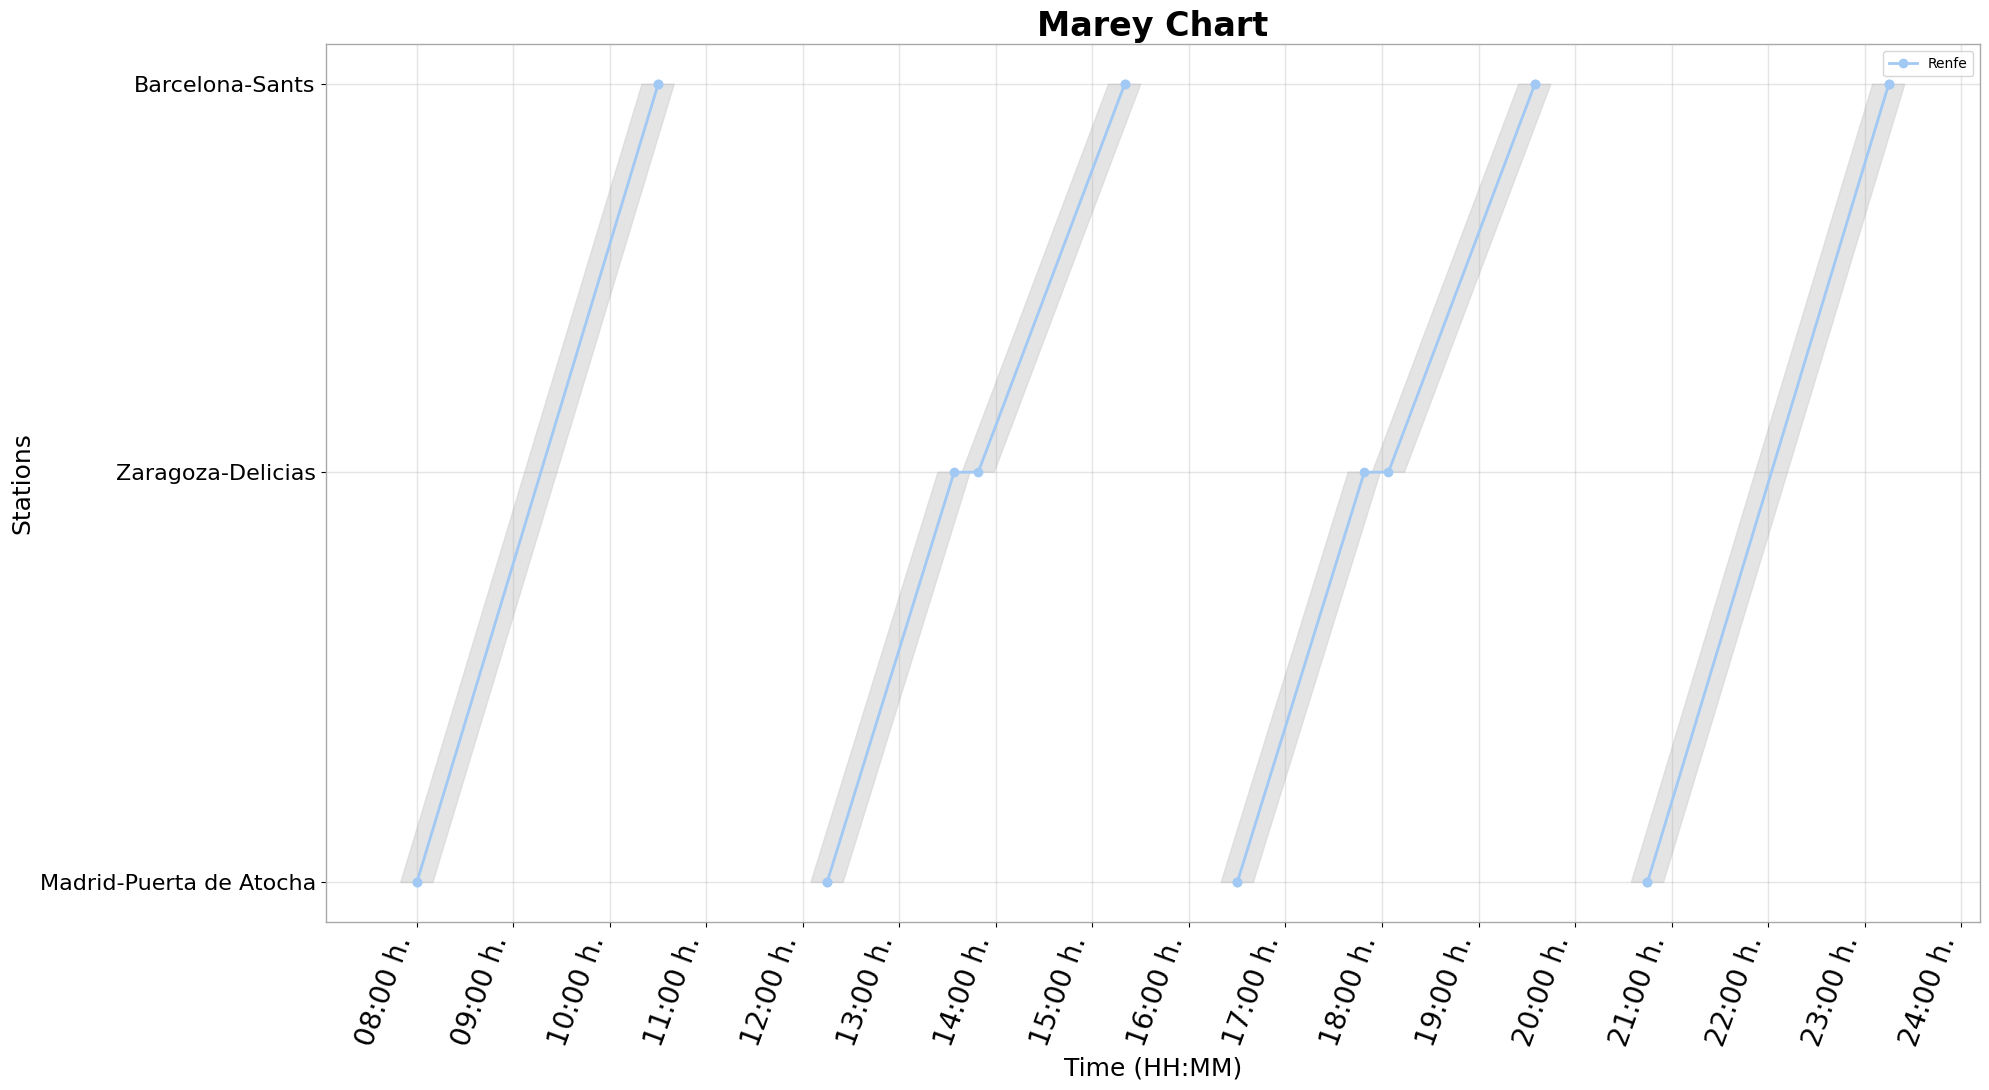

In [31]:
# TODO: Is it always necessary to provide an output path? It is unnecessary for marey chart

path_output_csv = '../data/test_case/output.csv'

kernel_plotter = KernelPlotter(
    path_output_csv=path_output_csv,
    path_config_supply=generator_save_path,
)

kernel_plotter.plot_marey_chart(
    save_path='../reports/figures/',
    safety_gap=SAFETY_GAP
)